In [1]:
# import pandas data set
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset:
df1 = pd.read_csv('Datasets_data.cso.ie\\PEA11.20231004T131042.csv')

In [3]:
# Displaying first 5 rows:
df1.head()

,STATISTIC Label,Year,Single Year of Age,Sex,UNIT,VALUE
0,Population estimates from 1926,1926,All ages,Both sexes,Number,2971992
1,Population estimates from 1926,1926,All ages,Male,Number,1506889
2,Population estimates from 1926,1926,All ages,Female,Number,1465103
3,Population estimates from 1926,1926,Under 1 year,Both sexes,Number,55391
4,Population estimates from 1926,1926,Under 1 year,Male,Number,28084


In [4]:
# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
df1_col_drop = ['STATISTIC Label','UNIT']
df1.drop(df1_col_drop ,axis=1, inplace=True) 

In [5]:
# Renaming the columns
df1 = df1.rename(columns={'Single Year of Age': 'Age_Group','VALUE':'Population'})

In [6]:
df1

,Year,Age_Group,Sex,Population
0,1926,All ages,Both sexes,2971992
1,1926,All ages,Male,1506889
2,1926,All ages,Female,1465103
3,1926,Under 1 year,Both sexes,55391
4,1926,Under 1 year,Male,28084
...,...,...,...,...
11812,2023,98 years,Male,197
11813,2023,98 years,Female,632
11814,2023,99 years and over,Both sexes,1600
11815,2023,99 years and over,Male,352


In [7]:
# Dropping rows based on criteria
df1 = df1[~((df1['Sex'] == 'Both sexes') | (df1['Age_Group'] == 'All ages'))]

# Display the modified DataFrame
df1

,Year,Age_Group,Sex,Population
4,1926,Under 1 year,Male,28084
5,1926,Under 1 year,Female,27307
7,1926,1 year,Male,28374
8,1926,1 year,Female,27502
10,1926,2 years,Male,29728
...,...,...,...,...
11810,2023,97 years,Female,821
11812,2023,98 years,Male,197
11813,2023,98 years,Female,632
11815,2023,99 years and over,Male,352


In [8]:
# Summing up the values by year
df1_Yearly_Sum = df1.groupby('Year')['Population'].sum().reset_index()
# Formatting the 'Value' column in millions
df1_Yearly_Sum['Population'] = df1_Yearly_Sum['Population'].apply(lambda x: '{:.3f}M'.format(x/1000000))

df1_Yearly_Sum

,Year,Population
0,1926,2.972M
1,1936,2.968M
2,1946,2.955M
3,1951,2.961M
4,1961,2.818M
5,1966,2.884M
6,1971,2.978M
7,1979,3.368M
8,1981,3.443M
9,1986,3.541M


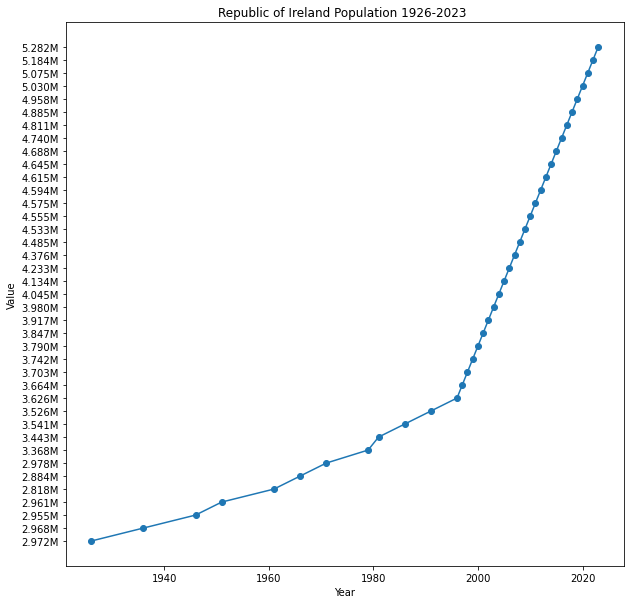

In [9]:


# Plot the standardized data
plt.figure(figsize=(10, 10))
plt.plot(df1_Yearly_Sum['Year'], df1_Yearly_Sum['Population'], marker='o')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Republic of Ireland Population 1926-2023 ')
plt.yticks(df1_Yearly_Sum['Population'])
plt.show()


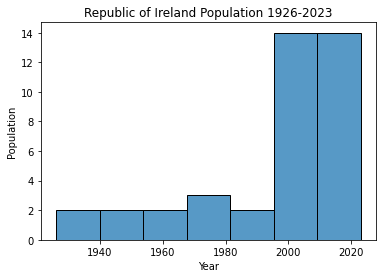

In [10]:
import seaborn as sns
ax = sns.histplot(df1_Yearly_Sum.Year)
ax.set(xlabel='Year', ylabel='Population', title ='Republic of Ireland Population 1926-2023');

In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
# Creating the DataFrame
data = {
    'Year': [1926, 1936, 1946, 1951, 1961, 1966, 1971, 1979, 1981, 1986, 1991, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Population': [2.972, 2.968, 2.955, 2.961, 2.818, 2.884, 2.978, 3.368, 3.443, 3.541, 3.526, 3.626, 3.664, 3.703, 3.742, 3.79, 3.847, 3.917, 3.98, 4.045, 4.134, 4.233, 4.376, 4.485, 4.533, 4.555, 4.575, 4.594, 4.615, 4.645, 4.688, 4.74, 4.811, 4.885, 4.958, 5.03, 5.075, 5.184, 5.282]
}

df = pd.DataFrame(data)

# Fitting a linear regression model
X = df['Year'].values.reshape(-1, 1)
y = df['Population'].values

model = LinearRegression()
model.fit(X, y)

# Predicting for the next 10 years
future_years = [[2024 + i] for i in range(10)]
predicted_population = model.predict(future_years)

# Printing the predicted population for the next 10 years
print("Predicted population for the next 10 years:")
for year, population in zip(range(2024, 2034), predicted_population):
    print(f"Year {year}: {population:.3f}M")

Predicted population for the next 10 years:
Year 2024: 4.795M
Year 2025: 4.822M
Year 2026: 4.849M
Year 2027: 4.876M
Year 2028: 4.903M
Year 2029: 4.930M
Year 2030: 4.956M
Year 2031: 4.983M
Year 2032: 5.010M
Year 2033: 5.037M


L: 5.282000000000004, k: 0.5, x0: 1011.5


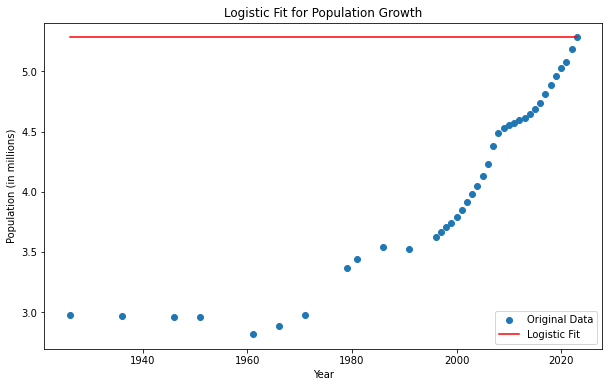

In [12]:
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Creating the DataFrame
data = {
    'Year': [1926, 1936, 1946, 1951, 1961, 1966, 1971, 1979, 1981, 1986, 1991, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Population': [2.972, 2.968, 2.955, 2.961, 2.818, 2.884, 2.978, 3.368, 3.443, 3.541, 3.526, 3.626, 3.664, 3.703, 3.742, 3.79, 3.847, 3.917, 3.98, 4.045, 4.134, 4.233, 4.376, 4.485, 4.533, 4.555, 4.575, 4.594, 4.615, 4.645, 4.688, 4.74, 4.811, 4.885, 4.958, 5.03, 5.075, 5.184, 5.282]
}

df = pd.DataFrame(data)

# Defining the logistic function
def logistic_function(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

x_data = df['Year'].values
y_data = df['Population'].values

# Fitting the data to the logistic function
popt, pcov = curve_fit(logistic_function, x_data, y_data, bounds=([max(y_data), 0, 0], [2 * max(y_data), 1, max(x_data)]))

# Getting the parameters of the logistic function
L, k, x0 = popt

# Printing the parameters of the logistic function
print(f"L: {L}, k: {k}, x0: {x0}")

# Plotting the original data and the logistic function
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_data, logistic_function(x_data, *popt), 'r-', label='Logistic Fit')
plt.xlabel('Year')
plt.ylabel('Population (in millions)')
plt.title('Logistic Fit for Population Growth')
plt.legend()
plt.show()


# df2

In [13]:
# Loading the dataset:
df2 = pd.read_csv('Datasets_data.cso.ie\\PEA07.20231004T131011.csv')

In [14]:
# Displaying first 5 rows:
df2.head()

,Statistic Label,Age Group,Sex,Regional Authority Area,Year,UNIT,VALUE
0,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,1996,Thousand,250.4
1,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,1997,Thousand,250.0
2,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,1998,Thousand,253.7
3,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,1999,Thousand,259.8
4,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,2000,Thousand,266.2


In [15]:
# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
df2_col_drop = ['Statistic Label','UNIT']
df2.drop(df2_col_drop ,axis=1, inplace=True)  

In [16]:
df2['VALUE'] = df2['VALUE'].apply(lambda x: x * 1000)

In [17]:
df2

,Age Group,Sex,Regional Authority Area,Year,VALUE
0,0 - 4 years,Both sexes,State,1996,250400.0
1,0 - 4 years,Both sexes,State,1997,250000.0
2,0 - 4 years,Both sexes,State,1998,253700.0
3,0 - 4 years,Both sexes,State,1999,259800.0
4,0 - 4 years,Both sexes,State,2000,266200.0
...,...,...,...,...,...
11281,All ages,Female,South-West,2013,338700.0
11282,All ages,Female,South-West,2014,341600.0
11283,All ages,Female,South-West,2015,343300.0
11284,All ages,Female,South-West,2016,345300.0


In [18]:
# Renaming the columns
df2 = df2.rename(columns={'Age Group': 'Age_Group','Regional Authority Area':'Area','VALUE':'Population'})

In [19]:
df2

,Age_Group,Sex,Area,Year,Population
0,0 - 4 years,Both sexes,State,1996,250400.0
1,0 - 4 years,Both sexes,State,1997,250000.0
2,0 - 4 years,Both sexes,State,1998,253700.0
3,0 - 4 years,Both sexes,State,1999,259800.0
4,0 - 4 years,Both sexes,State,2000,266200.0
...,...,...,...,...,...
11281,All ages,Female,South-West,2013,338700.0
11282,All ages,Female,South-West,2014,341600.0
11283,All ages,Female,South-West,2015,343300.0
11284,All ages,Female,South-West,2016,345300.0


In [20]:
# Dropping rows based on criteria
df2 = df2[~((df2['Sex'] == 'Both sexes') | (df2['Area'] == 'State') | (df2['Age_Group'] == 'All ages'))]

# Display the modified DataFrame
df2

,Age_Group,Sex,Area,Year,Population
220,0 - 4 years,Male,Border,1996,11900.0
221,0 - 4 years,Male,Border,1997,13900.0
222,0 - 4 years,Male,Border,1998,14100.0
223,0 - 4 years,Male,Border,1999,14500.0
224,0 - 4 years,Male,Border,2000,15200.0
...,...,...,...,...,...
10687,85 years and over,Female,South-West,2013,6300.0
10688,85 years and over,Female,South-West,2014,6500.0
10689,85 years and over,Female,South-West,2015,6700.0
10690,85 years and over,Female,South-West,2016,6800.0


In [21]:
# Finding the sum of 'VALUE' per 'Area', 'Year', and 'Sex'
df2_Sum_Area_Year = df2.groupby(['Year','Area'])['Population'].sum().reset_index()

# Converting the series to a DataFrame
df2_Sum_Area_Year = pd.DataFrame(df2_Sum_Area_Year)

df2_Sum_Area_Year

,Year,Area,Population
0,1996,Border,352200.0
1,1996,Dublin,407400.0
2,1996,Mid-East,1058600.0
3,1996,Mid-West,205600.0
4,1996,Midland,347500.0
...,...,...,...
171,2017,Mid-West,386900.0
172,2017,Midland,297400.0
173,2017,South-East,515400.0
174,2017,South-West,691200.0


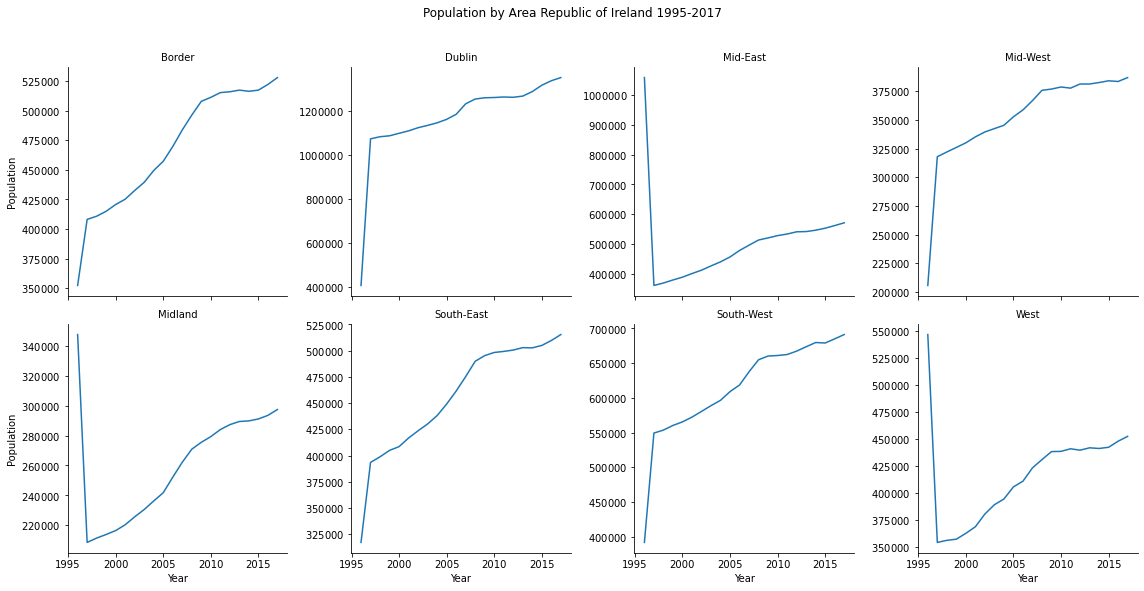

In [22]:
from matplotlib.ticker import ScalarFormatter
# Creating small multiples of line plots
g = sns.FacetGrid(df2_Sum_Area_Year, col="Area", col_wrap=4, height=4, sharey=False)
g.map(sns.lineplot, "Year", "Population")
g.set_titles("{col_name}")
g.set_xlabels("Year")
g.set_ylabels("Population")
g.fig.suptitle("Population by Area Republic of Ireland 1995-2017", y=1.02)
# Formatting the y-axis tick labels to display full numbers
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.yaxis.get_major_formatter().set_scientific(False)
plt.tight_layout() 
plt.show()


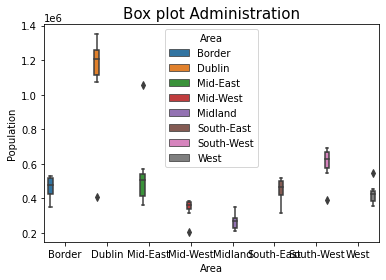

In [23]:
sns.boxplot(x = 'Area', y ='Population', data=df2_Sum_Area_Year, hue = 'Area')
plt.title('Box plot Administration', fontsize=15)
#plt.legend([], [], frameon=False)
plt.show()

In [24]:
df2_Sum_Area_Year

,Year,Area,Population
0,1996,Border,352200.0
1,1996,Dublin,407400.0
2,1996,Mid-East,1058600.0
3,1996,Mid-West,205600.0
4,1996,Midland,347500.0
...,...,...,...
171,2017,Mid-West,386900.0
172,2017,Midland,297400.0
173,2017,South-East,515400.0
174,2017,South-West,691200.0


# Area breakdown:

1. **Border**: Cavan, Donegal, Leitrim, Monaghan, Sligo.

2. **Midland**: Laois, Longford, Offaly, Westmeath.

3. **West**: Galway, Mayo, Roscommon.

4. **Dublin**: Dublin City, Dún Laoghaire-Rathdown, Fingal, South Dublin.

5. **Mid-East**: Kildare, Louth, Meath, Wicklow.

6. **Mid-West**: Clare, Limerick, Tipperary.

7. **South-East**: Carlow, Kilkenny, Waterford, Wexford.

8. **South-West**: Cork, Kerry.



# df3

In [25]:
# Loading the dataset:
df3 = pd.read_csv('Datasets_data.cso.ie\\PEA19.20231004T131056.csv')

In [26]:
# Displaying first 5 rows:
df3.head()

,STATISTIC Label,Year,Sex,Education Level,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration Aged 15 Years and Over (P...,2009,Both sexes,Higher secondary and below,Net migration,Thousand,-9.7
1,Estimated Migration Aged 15 Years and Over (P...,2009,Both sexes,Higher secondary and below,Emigrants: All destinations,Thousand,31.6
2,Estimated Migration Aged 15 Years and Over (P...,2009,Both sexes,Higher secondary and below,Immigrants: All origins,Thousand,21.9
3,Estimated Migration Aged 15 Years and Over (P...,2009,Both sexes,Post leaving cert,Net migration,Thousand,-0.2
4,Estimated Migration Aged 15 Years and Over (P...,2009,Both sexes,Post leaving cert,Emigrants: All destinations,Thousand,6.7


In [27]:
# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
df3_col_drop = ['STATISTIC Label','UNIT']
df3.drop(df3_col_drop ,axis=1, inplace=True) 

In [28]:
# Renaming the columns
df3 = df3.rename(columns={'Education Level': 'Education_Level','Inward or Outward Flow':'Inward_or_Outward_Flow'})

In [29]:
# Dropping rows based on criteria
df3 = df3[~((df3['Sex'] == 'Both sexes') | (df3['Inward_or_Outward_Flow'] == 'Net migration') | (df3['Education_Level'] == 'All persons'))]

df3['VALUE'] = df3['VALUE'].apply(lambda x: x * 1000)

In [30]:
# Display the modified DataFrame
df3



,Year,Sex,Education_Level,Inward_or_Outward_Flow,VALUE
16,2009,Male,Higher secondary and below,Emigrants: All destinations,18600.0
17,2009,Male,Higher secondary and below,Immigrants: All origins,11700.0
19,2009,Male,Post leaving cert,Emigrants: All destinations,5100.0
20,2009,Male,Post leaving cert,Immigrants: All origins,2900.0
22,2009,Male,Third level,Emigrants: All destinations,13600.0
...,...,...,...,...,...
620,2022,Female,Post leaving cert,Immigrants: All origins,1200.0
622,2022,Female,Third level,Emigrants: All destinations,14400.0
623,2022,Female,Third level,Immigrants: All origins,40300.0
625,2022,Female,Not stated,Emigrants: All destinations,1300.0


In [31]:
# Looking up distinct values within the df:
def df3_distinct(df3):
    for column in df3:
        unique_values = df3[column].unique()
        print(f"Unique values for {column}:")
        print(unique_values)
        print("\n")

# Call the function with your DataFrame as an argument
df3_distinct(df3)

Unique values for Year:
[2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]


Unique values for Sex:
['Male' 'Female']


Unique values for Education_Level:
['Higher secondary and below' 'Post leaving cert' 'Third level'
 'Not stated']


Unique values for Inward_or_Outward_Flow:
['Emigrants: All destinations' 'Immigrants: All origins']


Unique values for VALUE:
[18600. 11700.  5100.  2900. 13600. 16200.  3600.  3700. 13000. 10200.
  1600. 10800.  3400.  4600. 15500.  7300.  5700.  1800. 14700.  8400.
  1400. 11200.  7700.  1500.   700. 13200. 11100.  1700. 15700.  8900.
  4000. 17400. 10000.  2200.  1100. 14400.  2400. 18400. 12400. 15600.
  9700.  5000.  2300. 11800.  1000. 12500.  6500. 16600. 16400.  2000.
 16000.  9400.  1200. 14500. 17200.  7800. 15400. 14800.   800. 13400.
  7600.  3000.  2100.  2600.  2500. 10100.  7500. 19100.  3100.  3300.
 10700.  9000.   900. 16800.  3900.  8700. 20400.  1900.  4700.  5200.
 19600.  9300. 22800.  4300.  9200.  2700. 13900

# Binomial Distribution with n subsetting and increasing n.

We are going to model the Binomial Distribution for Males that have Post leaving cert education, we will be considering all year range


In [32]:
# Calculate the total sum of all values
total_sum = df3['VALUE'].sum()

# Calculate the probability for each row and store it in a new column 'Probability'
df3['Probability'] = df3['VALUE'] / total_sum

In [33]:
df3

,Year,Sex,Education_Level,Inward_or_Outward_Flow,VALUE,Probability
16,2009,Male,Higher secondary and below,Emigrants: All destinations,18600.0,0.010452
17,2009,Male,Higher secondary and below,Immigrants: All origins,11700.0,0.006575
19,2009,Male,Post leaving cert,Emigrants: All destinations,5100.0,0.002866
20,2009,Male,Post leaving cert,Immigrants: All origins,2900.0,0.001630
22,2009,Male,Third level,Emigrants: All destinations,13600.0,0.007643
...,...,...,...,...,...,...
620,2022,Female,Post leaving cert,Immigrants: All origins,1200.0,0.000674
622,2022,Female,Third level,Emigrants: All destinations,14400.0,0.008092
623,2022,Female,Third level,Immigrants: All origins,40300.0,0.022647
625,2022,Female,Not stated,Emigrants: All destinations,1300.0,0.000731


In [34]:
df3.Probability.sum()

0.9999999999999998

In [35]:
subset_df3 = df3[(df3['Sex'] == 'Male') & (df3['Education_Level'] == 'Post leaving cert') &(df3['Inward_or_Outward_Flow'] == 'Emigrants: All destinations')]
                
               

In [36]:
subset_df3 

,Year,Sex,Education_Level,Inward_or_Outward_Flow,VALUE,Probability
19,2009,Male,Post leaving cert,Emigrants: All destinations,5100.0,0.002866
64,2010,Male,Post leaving cert,Emigrants: All destinations,5700.0,0.003203
109,2011,Male,Post leaving cert,Emigrants: All destinations,4000.0,0.002248
154,2012,Male,Post leaving cert,Emigrants: All destinations,5000.0,0.002810
199,2013,Male,Post leaving cert,Emigrants: All destinations,3700.0,0.002079
244,2014,Male,Post leaving cert,Emigrants: All destinations,3000.0,0.001686
289,2015,Male,Post leaving cert,Emigrants: All destinations,2400.0,0.001349
334,2016,Male,Post leaving cert,Emigrants: All destinations,1900.0,0.001068
379,2017,Male,Post leaving cert,Emigrants: All destinations,1700.0,0.000955
424,2018,Male,Post leaving cert,Emigrants: All destinations,2100.0,0.001180


In [37]:
#Finding the probability from 2009 to 2022 for Male Emigrants that have Post leaving cert:
p=subset_df3.Probability.sum()
print(p)

0.02304017982579376


In [38]:
n  = len(subset_df3['Year'])
print(n)

14


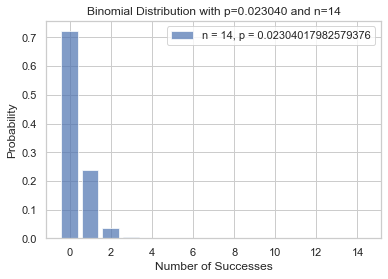

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import seaborn as sns
# Parameters for the Binomial distribution
p    # Probability of success
n   # Number of trials

# Generating the x values
x = np.arange(0, n + 1)

# Calculating the Binomial distribution for the given parameters
y = binom.pmf(x, n, p)

# Plotting the Binomial distribution
sns.set(style="whitegrid")
plt.bar(x, y, alpha=0.7, align='center', label=f'n = {n}, p = {p}')
plt.title('Binomial Distribution with p=0.023040 and n=14')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [40]:
n2=600

Incrementing n from 16 to 600 to see how the Binomial distribution evolves:

C:\Users\jose\anaconda3\lib\site-packages\scipy\stats\_discrete_distns.py:67: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


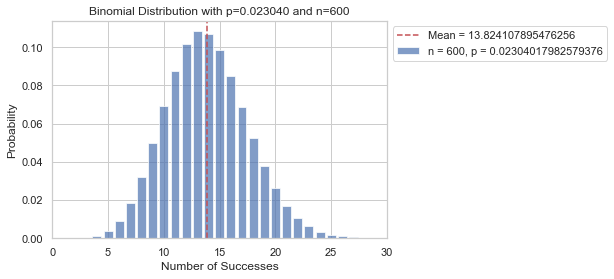

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters for the Binomial distribution
p    # Probability of success
n2   # Number of trials

# Generating the x values
x = np.arange(0, n2 + 1)

# Calculating the Binomial distribution for the given parameters
y = binom.pmf(x, n2, p)

# Plotting the Binomial distribution
plt.bar(x, y, alpha=0.7, align='center', label=f'n = {n2}, p = {p}')
plt.title('Binomial Distribution with p=0.023040 and n=600')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.legend()
# Setting the limits for the x-axis
plt.xlim(0, 30) 
# Calculating and plotting the mean line
mean = n2 * p
plt.axvline(x=mean, color='r', linestyle='--', label=f'Mean = {mean}')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


We can clearly see:
    
The Central Limit Theorem says that as n increases, the binomial distribution with n trials and probability p of success gets closer and closer to a normal distribution. That is, the binomial probability of any event gets closer and closer to the normal probability of the same event. The normal distribution has the same mean μ = np and standard deviation  as the binomial distribution.

# Poisson Distribution:

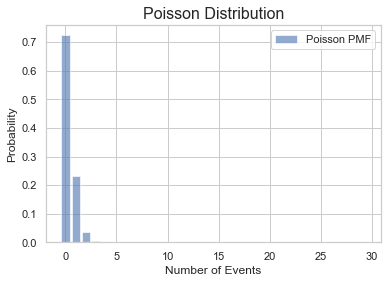

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parameters
p = 0.02304017982579376  # rate parameter for Poisson distribution
n = 14  # number of events

# Generate the Poisson distribution
x = np.arange(0, 30)
poisson_values = poisson.pmf(x, p * n)

# Plot the Poisson distribution as a bar chart
plt.bar(x, poisson_values, alpha=0.6, label='Poisson PMF', color='b')

# Set the title and labels
plt.title('Poisson Distribution', fontsize=16)
plt.xlabel('Number of Events', fontsize=12)
plt.ylabel('Probability', fontsize=12)

# Show the legend
plt.legend()

# Display the plot
plt.show()


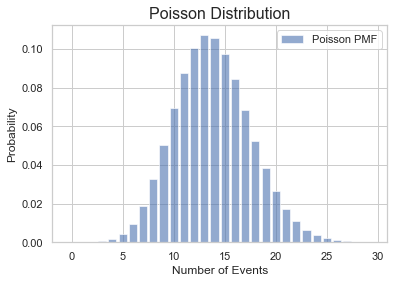

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
p = 0.02304017982579376  # rate parameter for Poisson distribution
n2 = 600  # number of events

# Generate the Poisson distribution
x = np.arange(0, 30)
poisson_values = poisson.pmf(x, p * n2)

# Plot the Poisson distribution as a bar chart
plt.bar(x, poisson_values, alpha=0.6, label='Poisson PMF', color='b')

# Set the title and labels
plt.title('Poisson Distribution', fontsize=16)
plt.xlabel('Number of Events', fontsize=12)
plt.ylabel('Probability', fontsize=12)

# Show the legend
plt.legend()

# Display the plot
plt.show()


# Normal distribution

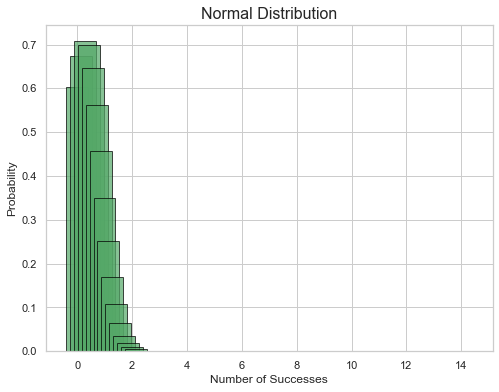

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
n = 14
p = 0.02304017982579376

# Generate values for the x-axis
x = np.linspace(0, n, 100)

# Calculate mean and standard deviation for normal distribution
mean_normal = n * p
std_dev_normal = np.sqrt(n * p * (1 - p))

# Calculate the normal distribution
normal_values = norm.pdf(x, mean_normal, std_dev_normal)

# Plotting the Normal distribution
plt.figure(figsize=(8, 6))
plt.bar(x, normal_values, alpha=0.7, color='g', edgecolor='black')

# Set the title and labels
plt.title('Normal Distribution', fontsize=16)
plt.xlabel('Number of Successes', fontsize=12)
plt.ylabel('Probability', fontsize=12)

# Display the plot
plt.show()


# sumary of Binomial, Poison and Normal distributions.

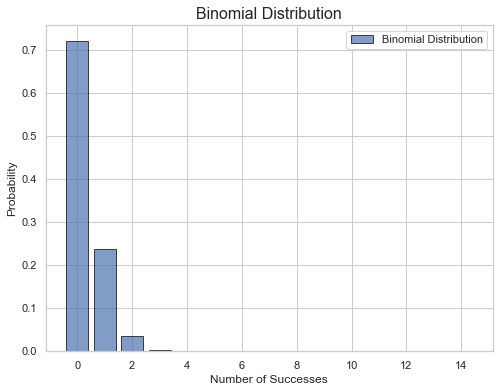

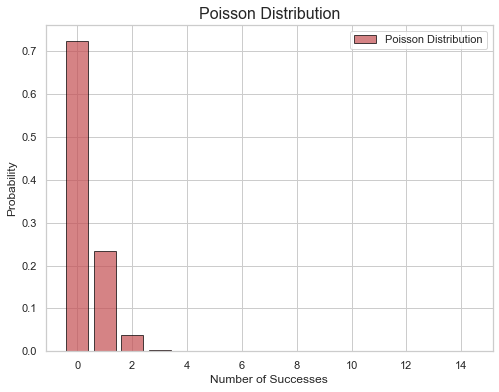

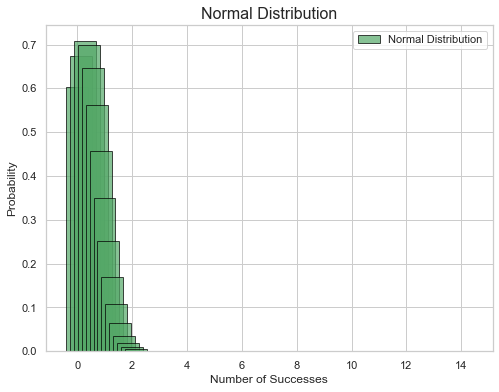

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, norm

# Parameters
n = 14
p = 0.02304017982579376

# Generate values for the x-axis
x = np.arange(0, n + 1)

# Binomial distribution
binomial_values = binom.pmf(x, n, p)

# Plotting the Binomial distribution
plt.figure(figsize=(8, 6))
plt.bar(x, binomial_values, label='Binomial Distribution', alpha=0.7, color='b', edgecolor='black')

# Set the title and labels
plt.title('Binomial Distribution', fontsize=16)
plt.xlabel('Number of Successes', fontsize=12)
plt.ylabel('Probability', fontsize=12)

# Show the legend
plt.legend()

# Display the plot
plt.show()

# Poisson distribution
lambda_poisson = n * p
poisson_values = poisson.pmf(x, lambda_poisson)

# Plotting the Poisson distribution
plt.figure(figsize=(8, 6))
plt.bar(x, poisson_values, label='Poisson Distribution', alpha=0.7, color='r', edgecolor='black')

# Set the title and labels
plt.title('Poisson Distribution', fontsize=16)
plt.xlabel('Number of Successes', fontsize=12)
plt.ylabel('Probability', fontsize=12)

# Show the legend
plt.legend()

# Display the plot
plt.show()

# Normal distribution
x = np.linspace(0, n, 100)
mean_normal = n * p
std_dev_normal = np.sqrt(n * p * (1 - p))
normal_values = norm.pdf(x, mean_normal, std_dev_normal)

# Plotting the Normal distribution
plt.figure(figsize=(8, 6))
plt.bar(x, normal_values, label='Normal Distribution', alpha=0.7, color='g', edgecolor='black')

# Set the title and labels
plt.title('Normal Distribution', fontsize=16)
plt.xlabel('Number of Successes', fontsize=12)
plt.ylabel('Probability', fontsize=12)

# Show the legend
plt.legend()

# Display the plot
plt.show()


# Studiying supervised learning techniques:

In [46]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 16 to 626
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    224 non-null    int64  
 1   Sex                     224 non-null    object 
 2   Education_Level         224 non-null    object 
 3   Inward_or_Outward_Flow  224 non-null    object 
 4   VALUE                   224 non-null    float64
 5   Probability             224 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 12.2+ KB


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [48]:
label_encoders = {}
categorical_columns = ["Sex", "Education_Level", "Inward_or_Outward_Flow"]
for col in categorical_columns:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col])
    label_encoders[col] = le


In [49]:
# Separating features and target variable
X = df3.drop("VALUE", axis=1)
y = df3["VALUE"]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [51]:
# Evaluating the models
print("Random Forest Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("Decision Tree Mean Squared Error:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree Mean Absolute Error:", mean_absolute_error(y_test, y_pred_dt))


Random Forest Mean Squared Error: 2460437.288888889
Random Forest Mean Absolute Error: 341.6
Decision Tree Mean Squared Error: 2161555.5555555555
Decision Tree Mean Absolute Error: 340.0


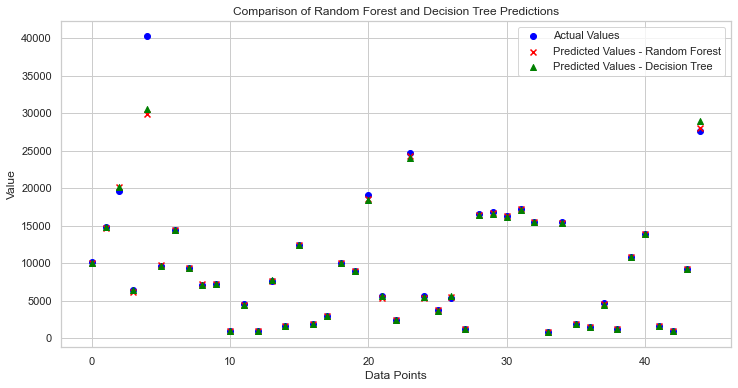

In [52]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(12, 6))

# Scatter plot for Random Forest
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_test)), y_pred_rf, color='red', label='Predicted Values - Random Forest', marker='x')

# Scatter plot for Decision Tree
plt.scatter(range(len(y_test)), y_pred_dt, color='green', label='Predicted Values - Decision Tree', marker='^')

plt.title('Comparison of Random Forest and Decision Tree Predictions')
plt.xlabel('Data Points')
plt.ylabel('Value')
plt.legend()
plt.show()


# Random forest

In [53]:
# Loading the dataset:
df3 = pd.read_csv('Datasets_data.cso.ie\\PEA19.20231004T131056.csv')
# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
df3_col_drop = ['STATISTIC Label','UNIT']
df3.drop(df3_col_drop ,axis=1, inplace=True) 
# Renaming the columns
df3 = df3.rename(columns={'Education Level': 'Education_Level','Inward or Outward Flow':'Inward_or_Outward_Flow'})
# Dropping rows based on criteria
df3 = df3[~((df3['Sex'] == 'Both sexes') | (df3['Inward_or_Outward_Flow'] == 'Net migration') | (df3['Education_Level'] == 'All persons'))]

df3['VALUE'] = df3['VALUE'].apply(lambda x: x * 1000)
df3

,Year,Sex,Education_Level,Inward_or_Outward_Flow,VALUE
16,2009,Male,Higher secondary and below,Emigrants: All destinations,18600.0
17,2009,Male,Higher secondary and below,Immigrants: All origins,11700.0
19,2009,Male,Post leaving cert,Emigrants: All destinations,5100.0
20,2009,Male,Post leaving cert,Immigrants: All origins,2900.0
22,2009,Male,Third level,Emigrants: All destinations,13600.0
...,...,...,...,...,...
620,2022,Female,Post leaving cert,Immigrants: All origins,1200.0
622,2022,Female,Third level,Emigrants: All destinations,14400.0
623,2022,Female,Third level,Immigrants: All origins,40300.0
625,2022,Female,Not stated,Emigrants: All destinations,1300.0


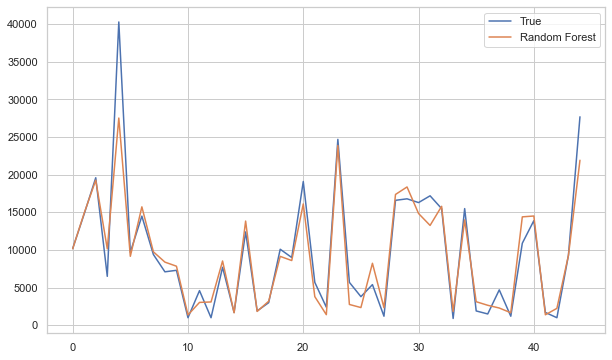

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Assuming your dataset is loaded in a DataFrame called df
# Make sure to preprocess the categorical columns appropriately

# Example preprocessing for categorical columns
df3 = pd.get_dummies(df3, columns=['Sex', 'Education_Level', 'Inward_or_Outward_Flow'])

# Define features and target variable
X = df3.drop('VALUE', axis=1)
y = df3['VALUE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Random Forest regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True')
plt.plot(model.predict(X_test), label='Random Forest')
plt.legend()
plt.show()


In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the test set
y_pred = model.predict(X_test)

# Compute mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest Mean Squared Error: {mse}")

# Compute mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Random Forest Mean Absolute Error: {mae}")


Random Forest Mean Squared Error: 6796539.488888889
Random Forest Mean Absolute Error: 1578.8222222222223


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming X and y are your feature and target variables
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate mean squared error and mean absolute error for training and testing datasets
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Print the results
print("Training Mean Squared Error:", mse_train)
print("Training Mean Absolute Error:", mae_train)
print("Testing Mean Squared Error:", mse_test)
print("Testing Mean Absolute Error:", mae_test)

# Compare the training and testing performance to assess whether the model is overfit or underfit


Training Mean Squared Error: 627036.7094972067
Training Mean Absolute Error: 564.4189944134079
Testing Mean Squared Error: 6466794.955555555
Testing Mean Absolute Error: 1549.6222222222223


Model is underfitted

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming X and y are your feature and target variables
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate mean squared error and mean absolute error for training and testing datasets
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Print the results
print("Training Mean Squared Error:", mse_train)
print("Training Mean Absolute Error:", mae_train)
print("Testing Mean Squared Error:", mse_test)
print("Testing Mean Absolute Error:", mae_test)

# Compare the training and testing performance to assess whether the model is overfit or underfit

Training Mean Squared Error: 738380.1785714285
Training Mean Absolute Error: 609.0892857142857
Testing Mean Squared Error: 6348204.982142857
Testing Mean Absolute Error: 1721.3035714285713


By changing the test size the model is overfitted

# Evaluating the performance of linear regression models on PEA04.20231004T131011.csv

In [58]:
# Loading the dataset:
df4 = pd.read_csv('Datasets_data.cso.ie\\PEA04.20231004T131011.csv')

In [59]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6669 entries, 0 to 6668
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  6669 non-null   object 
 1   Year             6669 non-null   int64  
 2   Age Group        6669 non-null   object 
 3   Sex              6669 non-null   object 
 4   Region           6669 non-null   object 
 5   UNIT             6669 non-null   object 
 6   VALUE            6669 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 364.8+ KB


In [60]:
# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
df4_col_drop = ['STATISTIC Label','UNIT']
df4.drop(df1_col_drop ,axis=1, inplace=True) 

In [61]:
# Renaming the columns
df4 = df4.rename(columns={'Age Group': 'Age_Group','VALUE':'Population'})

In [62]:
# Dropping rows based on criteria
df4 = df4[~((df4['Age_Group'] == 'All ages') | (df4['Sex'] == 'Both sexes') | (df4['Region'] == 'State'))]

In [63]:
# Convert the 'value' column to the full number format
df4['Population'] = df4['Population'].apply(lambda x: int(float(x) * 1000))

In [64]:
from sklearn.preprocessing import LabelEncoder

# Assume df is your pandas DataFrame and obj_cols are the object columns
obj_cols = ['Age_Group', 'Sex','Region']

# Create a label encoder object
label_encoder = LabelEncoder()

# Encode each of the object columns
for col in obj_cols:
    df4[col] = label_encoder.fit_transform(df4[col])

# Now your object columns are encoded to int64 or float64
print(df4.dtypes)

Year          int64
Age_Group     int32
Sex           int32
Region        int32
Population    int64
dtype: object


In [65]:
df4

,Year,Age_Group,Sex,Region,Population
10,2011,0,1,0,15800
11,2011,0,1,7,16600
12,2011,0,1,3,18000
13,2011,0,1,5,16400
14,2011,0,1,6,25500
...,...,...,...,...,...
6637,2023,17,0,5,5000
6638,2023,17,0,6,8100
6639,2023,17,0,1,15500
6640,2023,17,0,2,6000


In [66]:
# import train_test_split from the library sklearn
from sklearn.model_selection import train_test_split

# Declare a variable named as 'X' and 'y'
X = df4.iloc[:, :-1].values               # All features (independent varaibles) except Population
y = df4['Population'].values                    # Target variable

# Split the data into 70% and 30% by using a parameter test_size = 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Display the size of the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3744, 4), (3744,), (2620, 4), (1124, 4), (2620,), (1124,))

In [67]:
# Initialise an object slr by calling a method named as 'LinearRegression()'
slr = LinearRegression()

# Trian the model
slr.fit(X_train, y_train)

# Predict the results for the training and testing
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

# Display the values of y_train_pred and y_test_pred
# print(y_train_pred, '\t', y_test_pred)

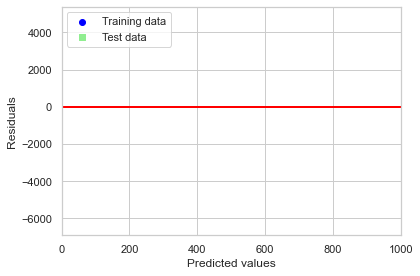

In [86]:
# Display the graph for the training and testing of the data
plt.scatter(y_train_pred,  y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 1000, lw = 2, color = 'red')
plt.xlim([0, 1000])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

In [83]:
print(y_train_pred - y_train)

[-139.6  -89.5  -22.6 ...   98.2   80.2  570.5]


In [84]:
# Calculate the r2_score and mean squared error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Display the means squared error and r2 score values
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 79837.092, test: 607474.822
R^2 train: 0.999, test: 0.995


# Ridge Regression

In [70]:
from sklearn.linear_model import Ridge

# Train the Ridge() mode by calling a fit() method
ridge = Ridge().fit(X_train, y_train)

# Display the score by using ridge object
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.25
Test set score: 0.23


In [71]:
# alpha = 10 is a parameter using a fit() method
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.25
Test set score: 0.23


In [72]:
# alpha = 0.1 is a parameter using a fit() method
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.25
Test set score: 0.23


# Lasso Regression

In [73]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.25
Test set score: 0.23
Number of features used: 4


In [74]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.25
Test set score: 0.23
Number of features used: 4


In [75]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.25
Test set score: 0.23
Number of features used: 4


# Decision tree regression

In [76]:
# Method or Function for Linear Regression plot
def lin_regplot(X, y, model):
    plt.scatter(X, y, c = 'blue')
    plt.plot(X, model.predict(X), color = 'red', linewidth = 2)    
    return

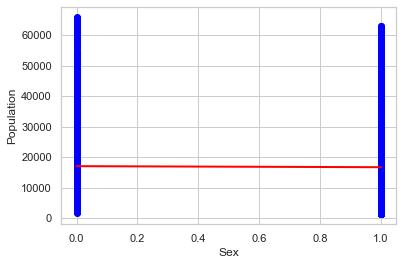

In [77]:
# import DecisionTreeRegressor from the sklearn library
from sklearn.tree import DecisionTreeRegressor

# Store the feature or attribute values in X and y
X = df4[['Sex']].values
y = df4['Population'].values

# Initialise an object by calling a method DecisionTreeRegressor()
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X, y)

# Return a copy of the array collapsed into one dimension.
sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Sex')
plt.ylabel('Population')
# plt.savefig('./figures/tree_regression.png', dpi = 300)
plt.show()

# Random Forest regression

In [78]:
# Declaration of Varaibles
X = df4.iloc[:, :-1].values          # Store all columns into an array (X) except last column, 'MEDV'
y = df4['Population'].values               # Store last column into an array (y)

# Use train_test_split method to split the data into 40% and 60%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [79]:
# import RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor

# Create an object forest by calling a method RandomForestRegressor()
forest = RandomForestRegressor(n_estimators = 1000, 
                               criterion='squared_error',  # Change 'mse' to 'squared_error'
                               random_state = 1, 
                               n_jobs = -1)

# Train the Model by calling a fit() method
forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# Display the r2 score values
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: 0.999, test: 0.995


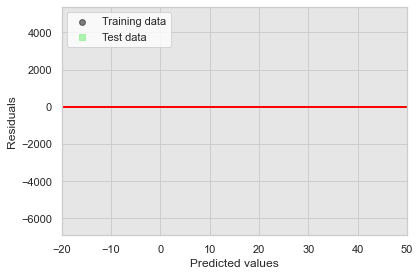

In [80]:
# Draw a scatter plot
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c = 'black', 
            marker = 'o', 
            s = 35,
            alpha = 0.5,
            label = 'Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c = 'lightgreen', 
            marker = 's', 
            s = 35,
            alpha = 0.7,
            label = 'Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -20, xmax = 50, lw = 2, color = 'red')
plt.xlim([-20, 50])
ax = plt.gca()
ax.set_facecolor('#e6e6e6')  # Change the background color to light gray
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()